# Prepare our enviroments

## For Manipulation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.3.5'

## For Model

In [ ]:
# work with linear model
from sklearn.linear_model import LinearRegression

# to have the mean_squared_error
from sklearn.metrics import mean_squared_error
# to have PolynomialFeatures 
from sklearn.preprocessing import PolynomialFeatures
# score for polynomial fit
from sklearn.metrics import r2_score

# to work with pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Read our csv file

In [ ]:
path_file = 'cars_to_model_development.csv'
path_file

'cars_to_model_development.csv'

In [ ]:
df_cars = pd.read_csv(path_file)
df_cars

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


(0.0, 48177.6297960545)

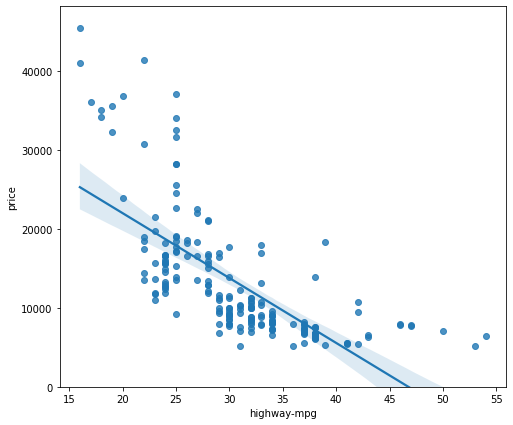

In [ ]:
plt.figure(figsize=(8,7))
sns.regplot(x = 'highway-mpg', y = 'price', data = df_cars)
plt.ylim(0,)

In [ ]:
coeff, p_value = stats.pearsonr(df_cars['highway-mpg'], df_cars['price'])
print('Correlation Coefficient: {}, P-Value: {}'.format(coeff, p_value))

Correlation Coefficient: -0.704692265058953, P-Value: 1.7495471144476358e-31


# Linear Regression

In [ ]:
# Create LinearRegression object
lm = LinearRegression()
x = df_cars[['highway-mpg']]
y = df_cars['price']
lm.fit(x,y)
yhat = lm.predict(x)

In [ ]:
lm.coef_

array([-821.73337832])

In [ ]:
lm.intercept_

38423.3058581574

**Equation**

Price = 38423.31 - 821.73*_**highway-mpg**_

In [ ]:
for i in range(5):
    print('Value {} -> Real: {}, Predict: {}'.format(i, y[i], yhat[i]))

Value 0 -> Real: 13495.0, Predict: 16236.504643465414
Value 1 -> Real: 16500.0, Predict: 16236.504643465414
Value 2 -> Real: 16500.0, Predict: 17058.23802178734
Value 3 -> Real: 13950.0, Predict: 13771.304508499637
Value 4 -> Real: 17450.0, Predict: 20345.171535075042


In [ ]:
# test with the fist element
yhat_0 = 38423.3058581574 - 821.73337*x.iloc[0]
print('yhat_0: {}'.format(yhat_0[0]))

yhat_0: 16236.5048681574


In [ ]:
lm.score(x, y)

0.4965911884339176

In [ ]:
mean_squared_error(y, yhat)

31635042.944639888

# Multiple Linear Regression

What if we want to predict car price using more than one variable?

In [ ]:
z = df_cars[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm2 = LinearRegression()
lm2.fit(z, y)

LinearRegression()

In [ ]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
lm2.intercept_

-15806.62462632922

**Equation**

price = -15806.624626329209 + 53.49574423*_**horsepower**_ + 4.70770099*_**curb-weight**_ + 81.53026382*_**engine-size**_ + 36.05748882*_**highway-mpg**_

# Model Evaluation using Visualization

## Linear Regression

### regression plot

(0.0, 48151.76837311903)

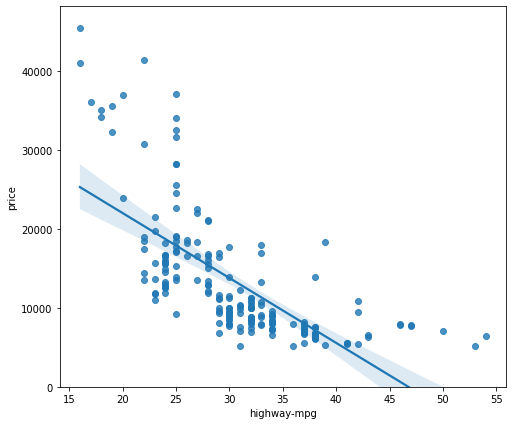

In [ ]:
plt.figure(figsize=(8,7))
sns.regplot(x = 'highway-mpg', y = 'price', data = df_cars)
plt.ylim(0,)

### residual plot

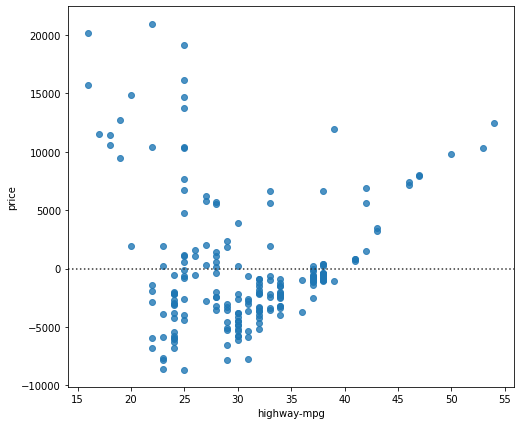

In [ ]:
plt.figure(figsize=(8,7))
sns.residplot(x = 'highway-mpg', y = 'price', data = df_cars)
plt.show()

## Multiple Linear Regression

In [ ]:
# predict the multiple linear regression
yhat_z = lm2.predict(z)

In [ ]:
yhat_z[:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

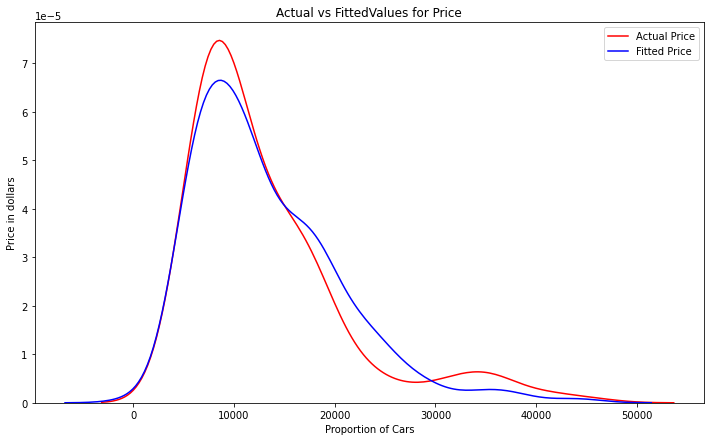

In [ ]:
plt.figure(figsize=(12,7))

ax1 = sns.kdeplot(df_cars['price'], color = 'r', label = 'Actual Price')
sns.kdeplot(yhat_z, color = 'b', label  = 'Fitted Price', ax =  ax1)

plt.title('Actual vs FittedValues for Price')
plt.xlabel('Proportion of Cars')
plt.ylabel('Price in dollars')
plt.legend()

plt.show()

# Polinomial Regression

In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df_cars['highway-mpg']
y = df_cars['price']

In [ ]:
# create 
f = np.polyfit(x, y, 3)
# 
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


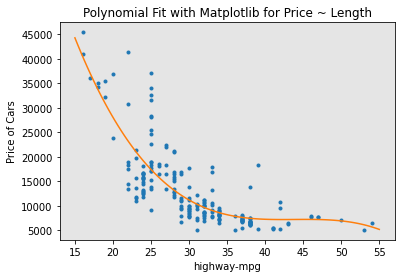

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
# now we are going to create polynomial with degree 11
f2 = np.polyfit(x, y, deg = 11)
p2 = np.poly1d(f2)
print(f2)

[-1.24263391e-08  4.72184893e-06 -8.02843483e-04  8.05640304e-02
 -5.29740982e+00  2.39470329e+02 -7.58845740e+03  1.68447254e+05
 -2.56531153e+06  2.55140622e+07 -1.49106965e+08  3.87930088e+08]


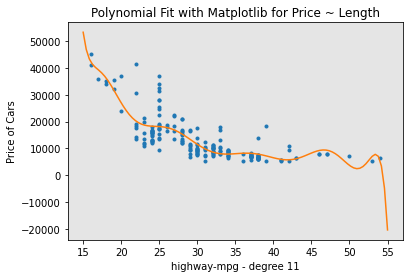

In [ ]:
PlotPolly(p2, x, y, 'highway-mpg - degree 11')

In [ ]:
# We are going to use PolynomialFeatures from sklearn.preprocessing
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [ ]:
z_pr = pr.fit_transform(z)

In [ ]:
# we have 4 features
z.shape

(201, 4)

In [ ]:
# now we have 15 features
z_pr.shape

(201, 15)

# Pipelines

In [ ]:
# create the list of tuples
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model
# using the features 'z' and target 'y'

# create the input
Input2 = [('scale',StandardScaler()), ('model', LinearRegression())]

# create out pipeline
pipe2 = Pipeline(Input2)

# fit our pipeline
z2 = z.astype(float)
pipe.fit(z2, y)

# predict with our pipeline
ypipe2 = pipe.predict(z2)

# print the first 10 values
ypipe2[:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

# Measures for In-Sample Evaluation

## Linear Regression

In [ ]:
x = df_cars[['highway-mpg']]
y = df_cars['price']

lm = LinearRegression()

lm.fit(x, y)

y_hat = lm.predict(x)

In [ ]:
# the more the better
lm.score(x, y)

0.4965911884339176

In [ ]:
# the least the better
mean_squared_error(y, y_hat)

31635042.944639888

## Multiple Linear Regression

In [ ]:
# work with 4 features
z = df_cars[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df_cars['price']

lm2 = LinearRegression()
lm2.fit(z, y)

y_hat_z = lm2.predict(z)

In [ ]:
lm2.score(z, y)

0.8093562806577457

In [ ]:
mean_squared_error(y, y_hat_z)

11980366.87072649

## Polynomial Fit

In [ ]:
x = df_cars['highway-mpg']
y = df_cars['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [ ]:
# score
score_poly_fit = r2_score(y, p(x))
score_poly_fit

0.674194666390652

In [ ]:
# mean squared error
mean_squared_error(y, p(x))

20474146.426361218

# Precision and Decision Making

## Prediction

In [ ]:
# create a new input
new_input = np.arange(1, 1000, 1).reshape(-1,1)
new_input

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [ ]:
x = df_cars[['highway-mpg']]
y = df_cars['price']

lm = LinearRegression()
lm.fit(x, y)

y_hat_new_data = lm.predict(new_input)
y_hat_new_data[:5]

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

In [ ]:
print('new_data_predicte:', y_hat_new_data[:5])

new_data_predicte: [37601.57247984 36779.83910151 35958.10572319 35136.37234487
 34314.63896655]


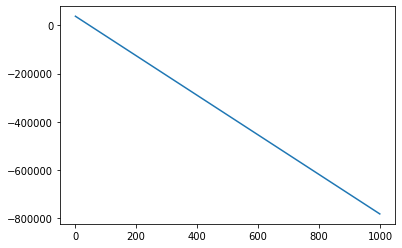

In [ ]:
# plot the new data
plt.plot(new_input, y_hat_new_data)
plt.show()

# Decision Making: Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>
<br>
<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


# Conclusion

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense that more than one of those variables are potential predictors of the final car price.</p>


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fabb4e41-fcd2-4421-bbfb-772986975631' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>